In [1]:
#Imported libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
import sklearn.metrics

In [2]:
#Loaded DataSet
test_df=pd.read_csv("/kaggle/input/titanic/test.csv")
train_df=pd.read_csv("/kaggle/input/titanic/train.csv")
GS_df=pd.read_csv("/kaggle/input/titanic/gender_submission.csv")

In [3]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
train_df=train_df.drop("PassengerId",axis=1)
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
GS_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [6]:
test_df = pd.merge(test_df, GS_df, on='PassengerId', how='inner')
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


#   ****Data preparation****

* Handle Missing Values
* Extract varaible 
* Remove outliers



In [7]:
#Handle Missing Values
train_df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [8]:
train_df=train_df.dropna()
test_df=test_df.dropna()

In [9]:
train_df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

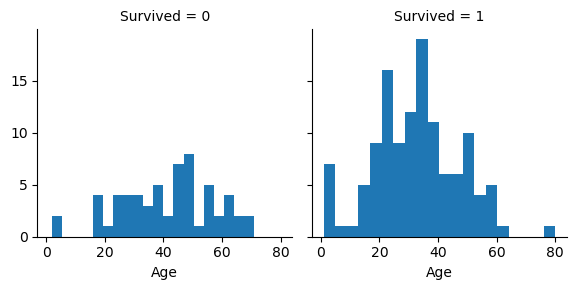

In [10]:
# Removing Outliers
import seaborn as sns
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist,'Age', bins=20)

In [11]:
train_df['Age'].min()

0.92

In [12]:
train_df1=train_df[train_df['Age'] <= 60 ][train_df.columns]
train_df2=train_df1[train_df1['Age']>= 20 ][train_df1.columns]
# or (train_df['Age'].max())
train_df2


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
21,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
...,...,...,...,...,...,...,...,...,...,...,...
867,0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,S
871,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C


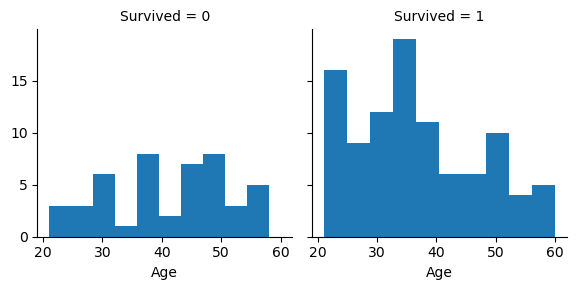

In [13]:
train_df=train_df2
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist,'Age', bins=10)
train_df['Age'].min()

train_df=train_df2


In [14]:
# Extract varaibles
x_train= pd.DataFrame(train_df[['Pclass',"Age","SibSp",'Parch','Fare']])
y_train= pd.DataFrame(train_df["Survived"])

x_test= pd.DataFrame(test_df[['Pclass',"Age","SibSp",'Parch','Fare']])
y_test= pd.DataFrame(test_df["Survived"])


In [15]:
x_train

,Pclass,Age,SibSp,Parch,Fare
1,1,38.0,1,0,71.2833
3,1,35.0,1,0,53.1000
6,1,54.0,0,0,51.8625
11,1,58.0,0,0,26.5500
21,2,34.0,0,0,13.0000
...,...,...,...,...,...
867,1,31.0,0,0,50.4958
871,1,47.0,1,1,52.5542
872,1,33.0,0,0,5.0000
879,1,56.0,0,1,83.1583


In [16]:
y_train

,Survived
1,1
3,1
6,0
11,1
21,1
...,...
867,0
871,1
872,0
879,1


# **Model Training**

**Decision Tree:**

In [17]:
from sklearn.tree import DecisionTreeClassifier  
import sklearn.metrics

classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
# classifier.fit(x_train,y_train)

ANN:

In [18]:

AdaBoost=AdaBoostClassifier(base_estimator=classifier,n_estimators=300,learning_rate=5)


In [19]:


boostmodel=AdaBoost.fit(x_train,y_train)


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [20]:
from sklearn import metrics
y_pred=boostmodel.predict(x_test)
predictions=metrics.accuracy_score(y_test,y_pred)

predictions*100

58.620689655172406

# **Prediction**

In [21]:
x_train

,Pclass,Age,SibSp,Parch,Fare
1,1,38.0,1,0,71.2833
3,1,35.0,1,0,53.1000
6,1,54.0,0,0,51.8625
11,1,58.0,0,0,26.5500
21,2,34.0,0,0,13.0000
...,...,...,...,...,...
867,1,31.0,0,0,50.4958
871,1,47.0,1,1,52.5542
872,1,33.0,0,0,5.0000
879,1,56.0,0,1,83.1583


In [22]:

boostmodel.predict([[1,38.0,1,0,71.2833]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


array([1])

# **Test accuracy**

In [23]:
y_test.count()


Survived    87
dtype: int64

In [24]:
y_predict=boostmodel.predict(x_test)
y_predict=pd.DataFrame(y_predict)
y_predict.count()

0    87
dtype: int64

In [25]:

from sklearn.metrics import confusion_matrix as CM
from sklearn import metrics
cm=CM(y_test,y_predict)

In [26]:
cm

array([[15, 28],
       [ 8, 36]])

In [27]:
acc=metrics.accuracy_score(y_test,y_predict)
acc*100

58.620689655172406

In [28]:
# Finding precision and recall
accuracy = metrics.accuracy_score(y_test, y_predict)
print("Accuracy   :", accuracy*100)
precision = metrics.precision_score(y_test, y_predict)
print("Precision :", precision*100)
recall = metrics.recall_score(y_test, y_predict)
print("Recall    :", recall*100)
F1_score = metrics.f1_score(y_test, y_predict)
print("F1-score  :", F1_score*100)

Accuracy   : 58.620689655172406
Precision : 56.25
Recall    : 81.81818181818183
F1-score  : 66.66666666666666


# **Virsualization**

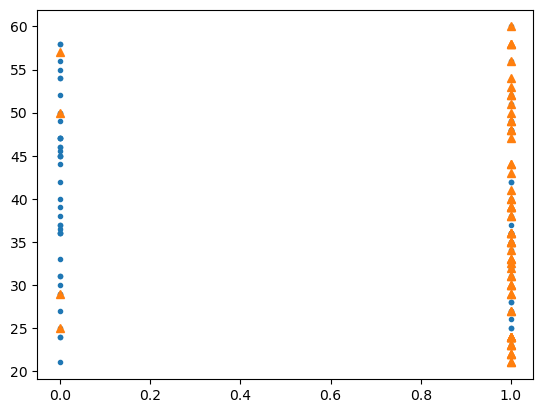

In [29]:
import numpy as np

xpoints = train_df[train_df["Sex"]=="male"]['Survived']
ypoints = train_df[train_df["Sex"]=="male"]["Age"]

x1points = train_df[train_df["Sex"]!="male"]['Survived']
y1points = train_df[train_df["Sex"]!="male"]["Age"]

plt.plot(xpoints, ypoints,".")
plt.plot(x1points, y1points,"^")





In [30]:
train_df["Age"].min(),train_df["Age"].max()

(21.0, 60.0)

21.0

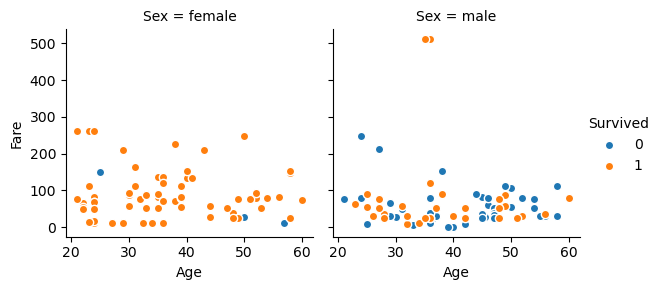

In [31]:
g = sns.FacetGrid(train_df, col='Sex',hue='Survived')
g.map(plt.scatter,'Age','Fare',edgecolor ="w").add_legend()
train_df['Age'].min()

/tmp/ipykernel_20/663931128.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.corr())


<Axes: >

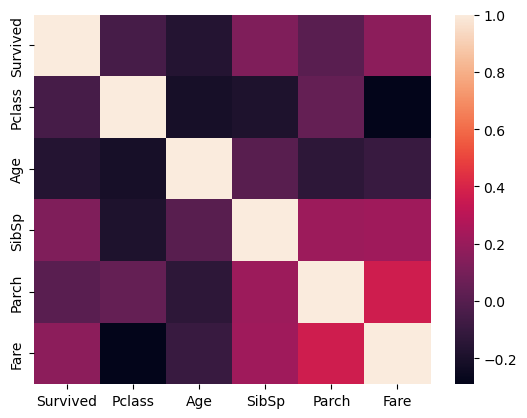

In [32]:
sns.heatmap(train_df.corr())

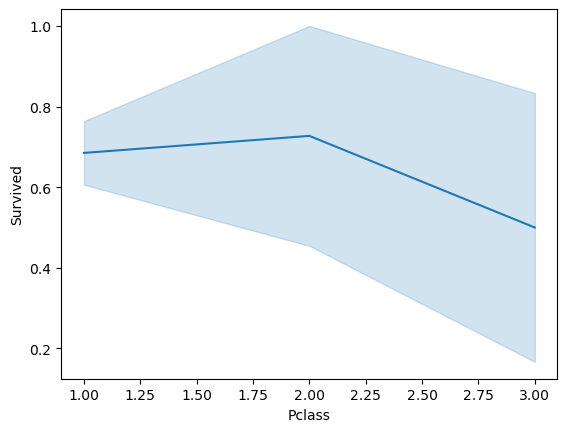

In [33]:
sns.lineplot(x="Pclass", y="Survived", data=train_df)
plt.show()

/tmp/ipykernel_20/2418938664.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['Parch'], kde = True, color ='red', bins = 30)


<Axes: xlabel='Parch', ylabel='Density'>

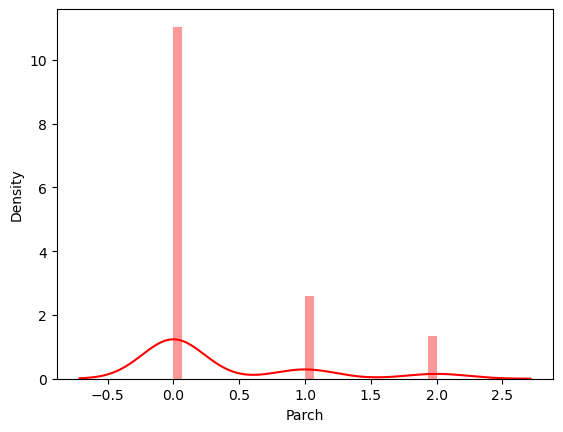

In [34]:

sns.distplot(train_df['Parch'], kde = True, color ='red', bins = 30)


<Axes: xlabel='Parch', ylabel='Survived'>

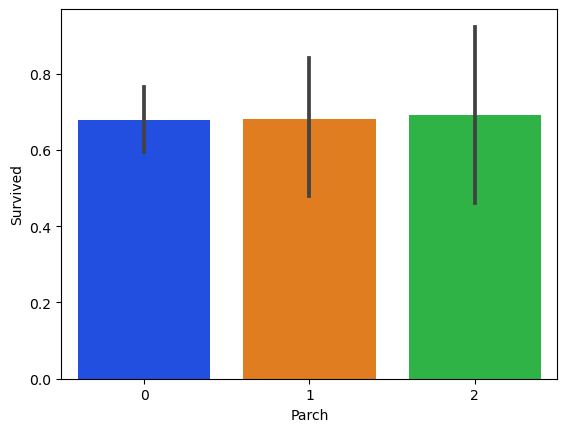

In [35]:

sns.barplot(data=train_df,x="Parch",y="Survived", palette='bright')

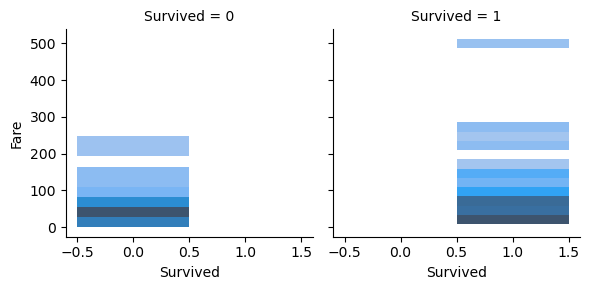

In [36]:

sea = sns.FacetGrid(train_df, col = "Survived")
sea.map(sns.histplot,"Survived","Fare")

<Axes: xlabel='SibSp', ylabel='count'>

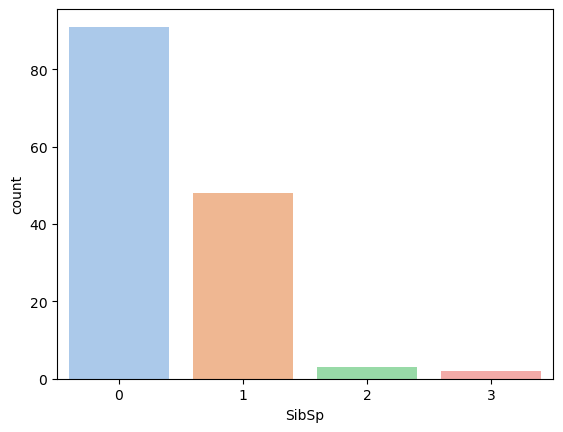

In [37]:
# sns.barplot(data=train_df,x="SibSp",y='Survived',color='y')


sns.countplot(x=train_df['SibSp'],palette='pastel')

# **Submission**

In [38]:
test_df.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
12,904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S,1


In [39]:
y_predict=boostmodel.predict(x_test)
y_predict=pd.DataFrame(y_predict)
submission=pd.DataFrame({'PassengerId':test_df['PassengerId'],'Survived':np.array(y_predict).ravel()})

#submit file

submission.to_csv("submission.csv", index=True)

